## Project Title : 
Churn Prediction Project 

## Project Description: 
This project is known as churn prediction for a telecome company.  Imagine that we are working at a telecom company that offers phone and internet
services, and we have a problem: some of our customers are churning. They no longer are using our services and are going to a different provider. We would like to prevent that from happening, so we develop a system for identifying these customers and offer them an incentive to stay. We want to target them with promotional messages and give them a discount. We also would like to understand why the model thinks our customers churn, and for that, we need to be able to interpret the model’s predictions.
 
We have collected a dataset where we’ve recorded some information about our customers: what type of services they used, how much they paid, and how long they stayed with us. We also know who canceled their contracts and stopped using our services (churned). We will use this information as the target variable in the machinelearning model and predict it using all other available information. 

The project plan is as follows: 
- First, we download the dataset and do some initial preparation: rename columns and change values inside columns to be consistent throughout the entire dataset.
- Then we split the data into train, validation, and test so we can validate our models.
- As part of the initial data analysis, we look at feature importance to identify which features are important in our data.
- We transform categorical variables into numeric variables so we can use them in the model.
- Finally, we train a logistic regression model.

## Dataset Description
- Url:  https://www.kaggle.com/blastchar/telco-customer-churn.

- Column description
    - CustomerID: the ID of the customer
    - Gender: male/female
    - SeniorCitizen: whether the customer is a senior citizen (0/1)
    - Partner: whether they live with a partner (yes/no)
    - Dependents: whether they have dependents (yes/no)
    - Tenure: number of months since the start of the contract
    - PhoneService: whether they have phone service (yes/no)
    - MultipleLines: whether they have multiple phone lines (yes/no/no phone service)
    - InternetService: the type of internet service (no/fiber/optic)
    - OnlineSecurity: if online security is enabled (yes/no/no internet)
    - OnlineBackup: if online backup service is enabled (yes/no/no internet)
    - DeviceProtection: if the device protection service is enabled (yes/no/no internet)
    - TechSupport: if the customer has tech support (yes/no/no internet)
    - StreamingTV: if the TV streaming service is enabled (yes/no/no internet)
    - StreamingMovies: if the movie streaming service is enabled (yes/no/no internet)
    - Contract: the type of contract (monthly/yearly/two years)
    - PaperlessBilling: if the billing is paperless (yes/no)
    - PaymentMethod: payment method (electronic check, mailed check, bank transfer, credit card)
    - MonthlyCharges: the amount charged monthly (numeric)
    - TotalCharges: the total amount charged (numeric)
    - Churn: if the client has canceled the contract (yes/no)

## Environment Configuration
- Installing virtual Env
    - pip install pipenv 

- Installing Packages
    - pipenv install jupyter notebook pandas pyarrow numpy matplotlib seaborn scikit-learn

- Starting Virtual Env
    - pipenv shell 

- Starting Notebook
    - jupyter-notebook 

- Stoping Notebook 
    - Ctrl+c

- Deactiving Virtual Env
    - exit

## Importing Libraries

In [1]:
## librarie(s) for loading and preprocessing 
import pandas as pd
import numpy as np
## libarie(s) for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
## library for building a validation framwork


## library for feature engineering 


## library for ml algorithms


## library for ml metrics 



## Loading And Data Overview

In [2]:
## load dataset
data = pd.read_csv('Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
## create a copy of the 
df = data.copy()

In [3]:
## view the first five rows 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
## last five rows 
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
## check for the total rows and columns 
print(f'The total number of rows are {df.shape[0]} and total number of columns are {df.shape[1]}')

The total number of rows are 7043 and total number of columns are 21


In [6]:
## check for the brief column summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
## check for missing values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
## lets check for duplicates 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [9]:
## check for uniqueness in each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
for each_col in df.columns:
    print(df[each_col].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


## Data Preprocessing 
- Normalizing the column names 
- Replacing empty string with nan and fill for missing values 
- deleted the customer id column 
- change the data type on the columns 
- any other processing that is necessary

In [11]:
## let convert the the column names to lower case
df.columns = df.columns.str.lower()

In [12]:
## preview the columns
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [13]:
## replace  values in totalcharges column
df['totalcharges'] = df['totalcharges'].replace(' ', np.nan)

In [14]:
## fill in the missing values in the totalcharges column with mean
df['totalcharges'] = df['totalcharges'].astype('float64')
mean_tc = df['totalcharges'].mean()
df['totalcharges'] = df['totalcharges'].fillna(mean_tc)

In [15]:
## delete the customer id column 
del df['customerid']

In [16]:
##del df['customerid']


In [17]:
## display the first five rows using the transpose
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No
onlinebackup,Yes,No,Yes,No,No


In [18]:
df.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [19]:
## lets change the datatype of 'object' columns to category datatypes.
df['gender'] = df['gender'].astype('category')
df['partner'] = df['partner'].astype('category')
df['dependents'] = df['dependents'].astype('category')
df['phoneservice'] = df['phoneservice'].astype('category')
df['multiplelines'] = df['multiplelines'].astype('category')
df['internetservice'] = df['internetservice'].astype('category')
df['onlinesecurity'] = df['onlinesecurity'].astype('category')
df['onlinebackup'] = df['onlinebackup'].astype('category')
df['deviceprotection'] = df['deviceprotection'].astype('category')
df['techsupport'] = df['techsupport'].astype('category')
df['streamingtv'] = df['streamingtv'].astype('category')
df['streamingmovies'] = df['streamingmovies'].astype('category')
df['contract'] = df['contract'].astype('category')
df['paperlessbilling'] = df['paperlessbilling'].astype('category')
df['paymentmethod'] = df['paymentmethod'].astype('category')
df['churn'] = df['churn'].astype('category')

In [20]:
## lets convert the target column, where yes == 1 and no = 0
df['churn'] = df['churn'].map({'Yes': 1, 'No':0})

In [21]:
## lets preview the churn column 
df['churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: category
Categories (2, int64): [0, 1]

In [22]:
df.to_csv('clean_Telco_Customer_Churn.csv')

Exploratory Data Analysis
- Target Variable Analysis 
- Outlier analysis 
- any other analysis which is important to this work.

df.to_

# Target Variable Analysis

In [23]:
# generate statistical summary of the numerical data
df.describe().round()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.0,7043.0,7043.0,7043.0
mean,0.0,32.0,65.0,2283.0
std,0.0,25.0,30.0,2265.0
min,0.0,0.0,18.0,19.0
25%,0.0,9.0,36.0,402.0
50%,0.0,29.0,70.0,1401.0
75%,0.0,55.0,90.0,3787.0
max,1.0,72.0,119.0,8685.0


In [24]:
numerical_cols = df.select_dtypes(include=('int','float'))

In [25]:
numerical_cols

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [26]:
correlation_data = numerical_cols.corr()

In [27]:
correlation_data

,seniorcitizen,tenure,monthlycharges,totalcharges
seniorcitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
monthlycharges,0.220173,0.247900,1.000000,0.650468
totalcharges,0.102395,0.824757,0.650468,1.000000


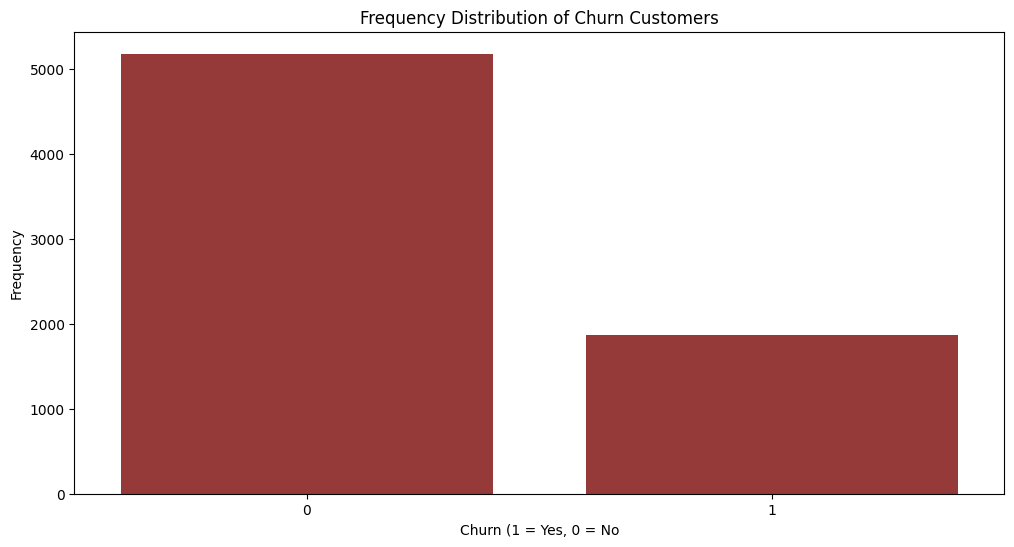

In [29]:
# specify the size of the frame using matplotlib
plt.figure(figsize=(12, 6))

sns.countplot(x='churn', color='brown', data=df)
plt.title("Frequency Distribution of Churn Customers")
plt.xlabel("Churn (1 = Yes, 0 = No")
plt.ylabel("Frequency")

plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='gender', hue='churn', data=df)
plt.title('Gender vs Churn')
        
plt.show()